# 🌾 Crop Yield Prediction using Machine Learning and Deep Learning

This notebook compares multiple models (Decision Tree, Random Forest, XGBoost, CNN, and LSTM) for predicting crop yields using weather and crop data.

**Author:** Wajeeha Sajid  
**Electrical and Computer Engineering**


In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Flatten
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Load dataset
df = pd.read_csv('/content/Crop_recommendation.csv')

In [ ]:
# Separate features and target variable
X = df.drop(columns=['humidity'])  # Features
y = df['humidity']  # Target variable


In [ ]:
# Encode categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X[categorical_cols])
columns_encoded = encoder.get_feature_names_out(categorical_cols)
X_encoded = pd.DataFrame(X_encoded.toarray(), columns=columns_encoded)  # Convert to array and then DataFrame
X.drop(columns=categorical_cols, inplace=True)
X = pd.concat([X, X_encoded], axis=1)

In [ ]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_encoded)

In [ ]:
# Function to train and evaluate Decision Tree model
def train_decision_tree(X_train, y_train, X_test, y_test):
    dt = DecisionTreeRegressor(random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    return mean_squared_error(y_test, y_pred, squared=False), mean_absolute_error(y_test, y_pred)

In [ ]:
# Function to train and evaluate RandomForest model
def train_random_forest(X_train, y_train, X_test, y_test):
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    return mean_squared_error(y_test, y_pred, squared=False), mean_absolute_error(y_test, y_pred)


In [ ]:
# Function to build and train CNN model
def build_cnn(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

In [ ]:
# Function to build and train LSTM model
def build_lstm(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

In [ ]:
# Prepare data for CNN
X_cnn = X.values.reshape((X.shape[0], X.shape[1], 1))

In [ ]:
# Prepare data for LSTM
X_lstm = X.values.reshape((X.shape[0], 1, X.shape[1]))

In [ ]:
# Initialize k-fold cross-validation
kf = KFold(n_splits=4, shuffle=True, random_state=42)

In [ ]:
# Lists to store evaluation metrics
dt_rmse_scores = []
dt_mae_scores = []
rf_rmse_scores = []
rf_mae_scores = []
xgb_rmse_scores = []
xgb_mae_scores = []
cnn_rmse_scores = []
cnn_mae_scores = []
lstm_rmse_scores = []
lstm_mae_scores = []


In [ ]:
# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Decision Tree
    dt_rmse, dt_mae = train_decision_tree(X_train, y_train, X_test, y_test)
    dt_rmse_scores.append(dt_rmse)
    dt_mae_scores.append(dt_mae)

    # RandomForest
    rf_rmse, rf_mae = train_random_forest(X_train, y_train, X_test, y_test)
    rf_rmse_scores.append(rf_rmse)
    rf_mae_scores.append(rf_mae)

    # XGBoost
    xgb_rmse, xgb_mae = train_xgboost(X_train, y_train, X_test, y_test)
    xgb_rmse_scores.append(xgb_rmse)
    xgb_mae_scores.append(xgb_mae)

    # CNN
    cnn_model = build_cnn((X.shape[1], 1))
    cnn_model.fit(X_cnn[train_index], y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
    y_pred_cnn = cnn_model.predict(X_cnn[test_index])
    cnn_rmse = mean_squared_error(y_test, y_pred_cnn, squared=False)
    cnn_mae = mean_absolute_error(y_test, y_pred_cnn)
    cnn_rmse_scores.append(cnn_rmse)
    cnn_mae_scores.append(cnn_mae)

    # LSTM
    lstm_model = build_lstm((1, X.shape[1]))
    lstm_model.fit(X_lstm[train_index], y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
    y_pred_lstm = lstm_model.predict(X_lstm[test_index])
    lstm_rmse = mean_squared_error(y_test, y_pred_lstm, squared=False)
    lstm_mae = mean_absolute_error(y_test, y_pred_lstm)
    lstm_rmse_scores.append(lstm_rmse)
    lstm_mae_scores.append(lstm_mae)

18/18 [==============================] - 0s 3ms/step


In [ ]:
# Print evaluation metrics
print('Decision Tree RMSE:', dt_rmse_scores)
print('Decision Tree MAE:', dt_mae_scores)
print('Random Forest RMSE:', rf_rmse_scores)
print('Random Forest MAE:', rf_mae_scores)
print('XGBoost RMSE:', xgb_rmse_scores)
print('XGBoost MAE:', xgb_mae_scores)
print('CNN RMSE:', cnn_rmse_scores)
print('CNN MAE:', cnn_mae_scores)
print('LSTM RMSE:', lstm_rmse_scores)
print('LSTM MAE:', lstm_mae_scores)

Decision Tree RMSE: [6.867185709416464, 5.536672580411064, 5.436154701065695, 6.254483492332973]
Decision Tree MAE: [4.340553197418181, 3.852407500272728, 3.7052088148363636, 4.058286518345454]
Random Forest RMSE: [4.9553099345853395, 4.312128750481586, 4.039743261662626, 4.603819438057237]
Random Forest MAE: [3.2398755270914554, 2.9632682636860013, 2.851081999634002, 3.1269258013809087]
XGBoost RMSE: [5.1536715319135755, 4.842427070864152, 4.605771444370038, 4.802551202845511]
XGBoost MAE: [3.4201011656806024, 3.243366666573731, 3.1941436699475725, 3.27807704092508]
CNN RMSE: [8.296953032168025, 8.841165818125768, 8.11339352858014, 9.921162364013615]
CNN MAE: [5.528163412751704, 5.954930679414187, 5.427396295987903, 6.902589270987233]
LSTM RMSE: [8.409829414967314, 7.822817008165322, 6.88183242842667, 9.18139478698296]
LSTM MAE: [5.8442983710501375, 5.113440241522367, 4.7668393171030985, 6.234111135318892]


In [ ]:
import matplotlib.pyplot as plt

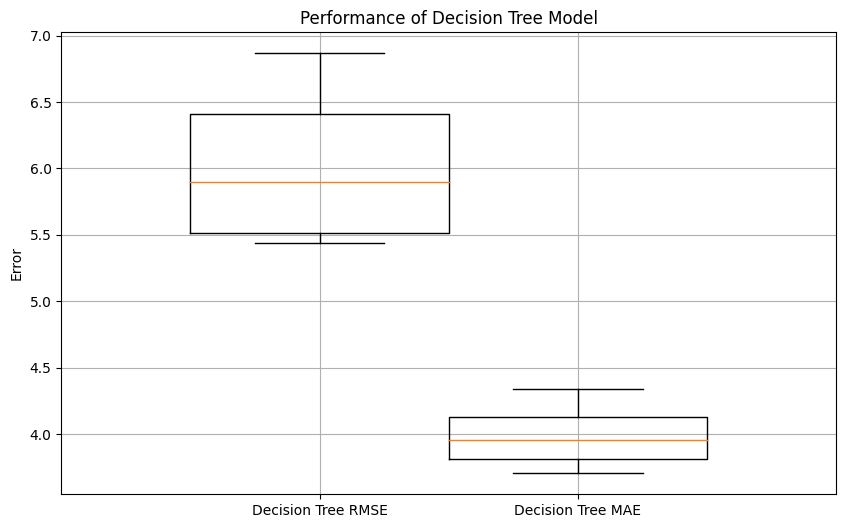

In [ ]:
# Box plot for Decision Tree
plt.figure(figsize=(10, 6))
plt.boxplot(dt_rmse_scores, positions=[1], widths=0.5, showfliers=False)
plt.boxplot(dt_mae_scores, positions=[1.5], widths=0.5, showfliers=False)
plt.xticks([1, 1.5], ['Decision Tree RMSE', 'Decision Tree MAE'])
plt.ylabel('Error')
plt.title('Performance of Decision Tree Model')
plt.grid(True)
plt.show()

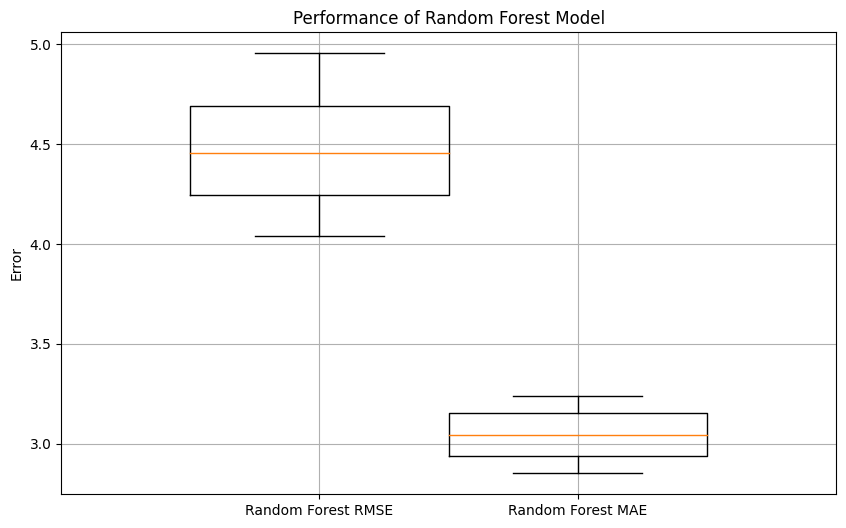

In [ ]:
# Box plot for RandomForest
plt.figure(figsize=(10, 6))
plt.boxplot(rf_rmse_scores, positions=[1], widths=0.5, showfliers=False)
plt.boxplot(rf_mae_scores, positions=[1.5], widths=0.5, showfliers=False)
plt.xticks([1, 1.5], ['Random Forest RMSE', 'Random Forest MAE'])
plt.ylabel('Error')
plt.title('Performance of Random Forest Model')
plt.grid(True)
plt.show()

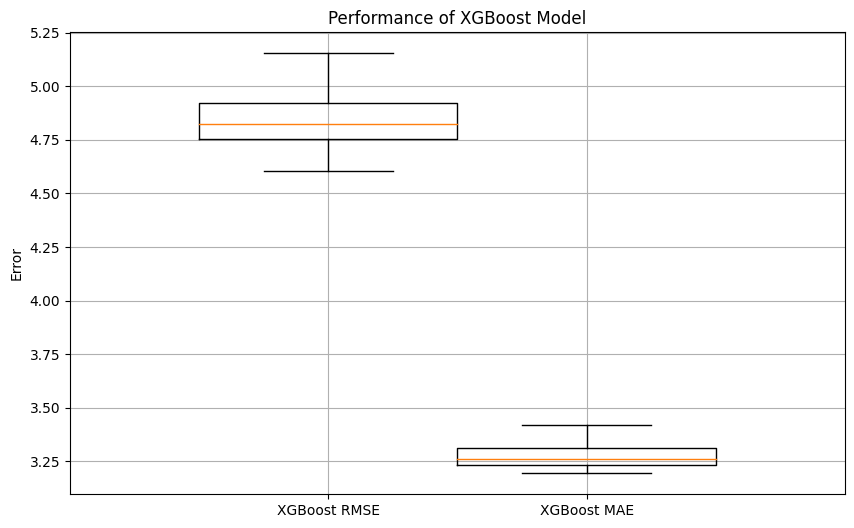

In [ ]:
# Box plot for XGBoost
plt.figure(figsize=(10, 6))
plt.boxplot(xgb_rmse_scores, positions=[1], widths=0.5, showfliers=False)
plt.boxplot(xgb_mae_scores, positions=[1.5], widths=0.5, showfliers=False)
plt.xticks([1, 1.5], ['XGBoost RMSE', 'XGBoost MAE'])
plt.ylabel('Error')
plt.title('Performance of XGBoost Model')
plt.grid(True)
plt.show()

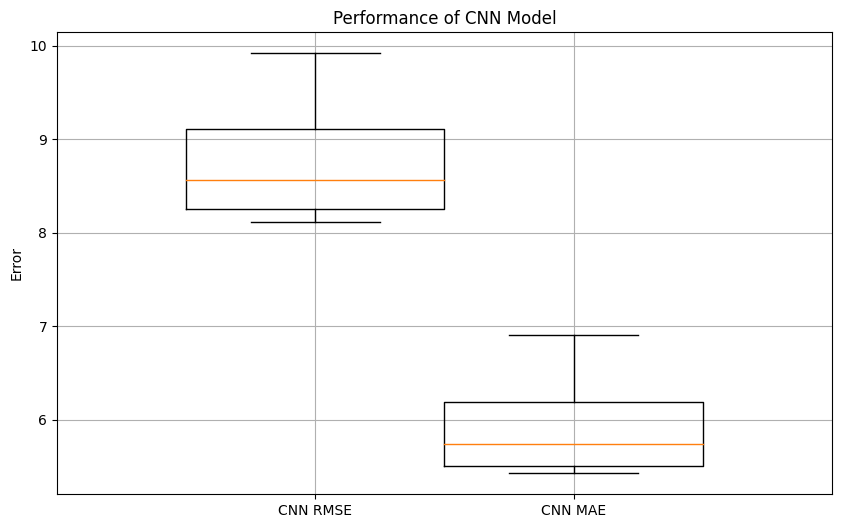

In [ ]:
# Box plot for CNN
plt.figure(figsize=(10, 6))
plt.boxplot(cnn_rmse_scores, positions=[1], widths=0.5, showfliers=False)
plt.boxplot(cnn_mae_scores, positions=[1.5], widths=0.5, showfliers=False)
plt.xticks([1, 1.5], ['CNN RMSE', 'CNN MAE'])
plt.ylabel('Error')
plt.title('Performance of CNN Model')
plt.grid(True)
plt.show()

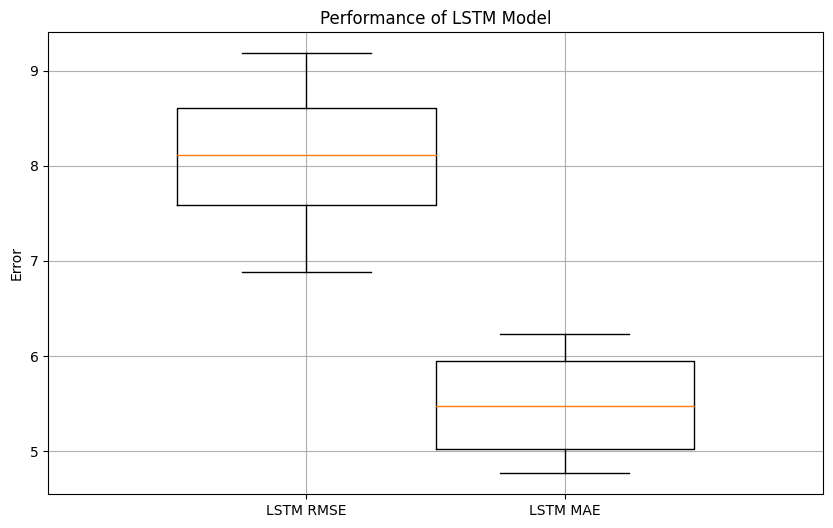

In [ ]:
# Box plot for LSTM
plt.figure(figsize=(10, 6))
plt.boxplot(lstm_rmse_scores, positions=[1], widths=0.5, showfliers=False)
plt.boxplot(lstm_mae_scores, positions=[1.5], widths=0.5, showfliers=False)
plt.xticks([1, 1.5], ['LSTM RMSE', 'LSTM MAE'])
plt.ylabel('Error')
plt.title('Performance of LSTM Model')
plt.grid(True)
plt.show()